In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [36]:
import pandas as pd

df = pd.read_csv('F1_race_results.csv', encoding='latin1')

# Display the first few rows of the dataframe to ensure it loaded correctly
df.head()



,GRAND PRIX,DATE,WINNER,CAR,LAPS,TIME
0,Great Britain,5/13/50,Nino Farina,ALFA ROMEO,70,2:13:23
1,Monaco,5/21/50,Juan Manuel Fangio,ALFA ROMEO,100,3:13:18
2,United States,5/30/50,Johnnie Parsons,KURTIS KRAFT OFFENHAUSER,138,2:46:55
3,Switzerland,6/4/50,Nino Farina,ALFA ROMEO,42,2:02:53
4,Belgium,6/18/50,Juan Manuel Fangio,ALFA ROMEO,35,2:47:26


In [37]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1112 entries, 0 to 1111
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   GRAND PRIX  1112 non-null   object
 1   DATE        1112 non-null   object
 2   WINNER      1112 non-null   object
 3   CAR         1112 non-null   object
 4   LAPS        1112 non-null   int64 
 5   TIME        1112 non-null   object
dtypes: int64(1), object(5)
memory usage: 52.3+ KB


In [38]:
df.describe()


,LAPS
count,1112.000000
mean,64.678058
std,20.221873
min,3.000000
25%,54.000000
50%,65.000000
75%,72.000000
max,200.000000


In [39]:
df.isnull().sum()


GRAND PRIX    0
DATE          0
WINNER        0
CAR           0
LAPS          0
TIME          0
dtype: int64

In [40]:
# Summary statistics for numerical columns
df.describe()

# Count of races per Grand Prix
df['GRAND PRIX'].value_counts()

# Count of wins per driver
df['WINNER'].value_counts()


WINNER
Lewis Hamilton        103
Michael Schumacher     91
Max Verstappen         61
Sebastian Vettel       53
Alain Prost            51
                     ... 
Carlos Pace             1
Jochen Mass             1
Vittorio Brambilla      1
Alessandro Nannini      1
Lando Norris            1
Name: count, Length: 112, dtype: int64

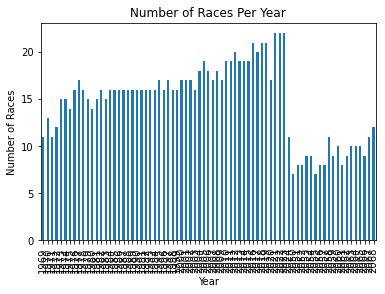

In [42]:
# Convert DATE to datetime
df['DATE'] = pd.to_datetime(df['DATE'], format='%m/%d/%y')

# Number of races per year
df['Year'] = df['DATE'].dt.year
races_per_year = df['Year'].value_counts().sort_index()
races_per_year.plot(kind='bar', title='Number of Races Per Year')
plt.xlabel('Year')
plt.ylabel('Number of Races')
plt.show()


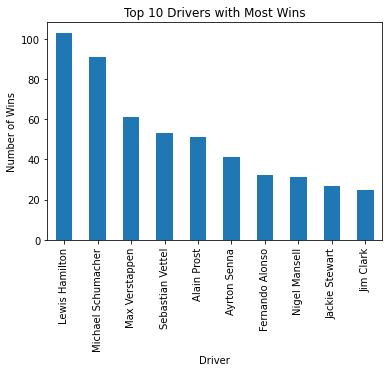

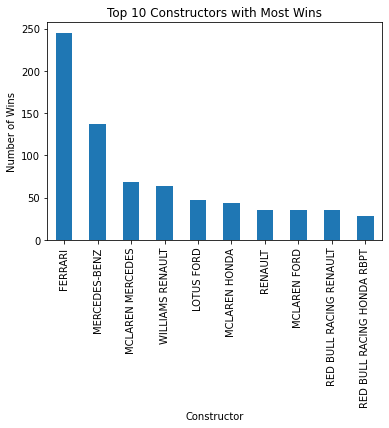

In [43]:
# Top drivers with the most wins
top_drivers = df['WINNER'].value_counts().head(10)
top_drivers.plot(kind='bar', title='Top 10 Drivers with Most Wins')
plt.xlabel('Driver')
plt.ylabel('Number of Wins')
plt.show()

# Top constructors with the most wins
top_constructors = df['CAR'].value_counts().head(10)
top_constructors.plot(kind='bar', title='Top 10 Constructors with Most Wins')
plt.xlabel('Constructor')
plt.ylabel('Number of Wins')
plt.show()


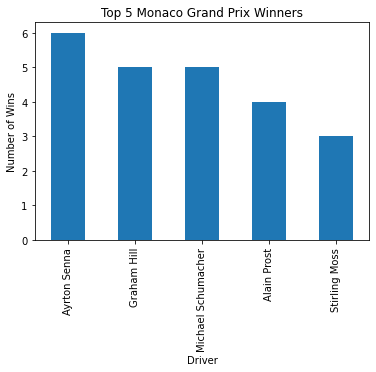

In [51]:
# Filter the DataFrame for the Monaco Grand Prix
monaco_gp = df[df['GRAND PRIX'] == 'Monaco']

# Count the number of wins for each driver and select the top 5
monaco_gp_winners = monaco_gp['WINNER'].value_counts().head(5)

# Plot the results
monaco_gp_winners.plot(kind='bar', title='Top 5 Monaco Grand Prix Winners')
plt.xlabel('Driver')
plt.ylabel('Number of Wins')
plt.show()

                  LAPS  TIME_SECONDS
LAPS          1.000000      0.473455
TIME_SECONDS  0.473455      1.000000


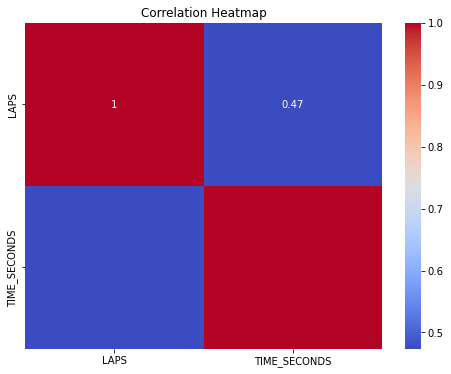

In [46]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

# Function to convert TIME to seconds, handling different formats
def time_to_seconds(time_str):
    try:
        parts = time_str.split(':')
        if len(parts) == 3:
            h, m, s = map(int, parts)
            return datetime.timedelta(hours=h, minutes=m, seconds=s).total_seconds()
        elif len(parts) == 2:  # Handling case with hh:mm format
            h, m = map(int, parts)
            return datetime.timedelta(hours=h, minutes=m).total_seconds()
        else:
            return None
    except:
        return None

df['TIME_SECONDS'] = df['TIME'].apply(time_to_seconds)

# Drop rows with invalid TIME_SECONDS
df = df.dropna(subset=['TIME_SECONDS'])

# Calculate the correlation between laps and race duration
correlation = df[['LAPS', 'TIME_SECONDS']].corr()
print(correlation)

# Plotting the correlation heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


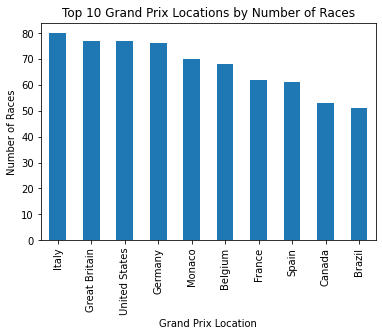

In [49]:
# Count of races per Grand Prix location
gp_location_counts = df['GRAND PRIX'].value_counts().head(10)
gp_location_counts.plot(kind='bar', title='Top 10 Grand Prix Locations by Number of Races')
plt.xlabel('Grand Prix Location')
plt.ylabel('Number of Races')
plt.show()
